In [20]:
# Load the dataset

import pandas as pd

df = pd.read_excel("Bike_Rental_data.xlsx")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,2011-01-01 00:00:00,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,2011-01-01 00:00:00,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,2011-01-01 00:00:00,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,?,0,5,27,32.004786
3,3.993251,2011-01-01 00:00:00,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,2011-01-01 00:00:00,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


In [21]:
## Descriptive statistics

df.info()
df.describe(include="all")
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100576 non-null  object 
 11  atemp       100576 non-null  object 
 12  hum         100576 non-null  object 
 13  windspeed   100576 non-null  object 
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


(100576, 17)

#### There are 100576 rows with 17 columns in the dataset.

In [22]:
## Check for missing values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no missing values in the dataset

In [23]:
# Fix decimal errors in integer columns
int_cols = ["hr", "weekday", "casual", "registered", "cnt"]

# for col in int_cols:
#     df[col] = df[col].round()

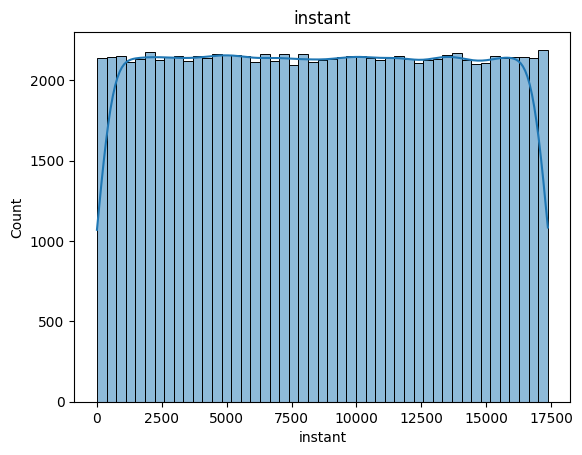

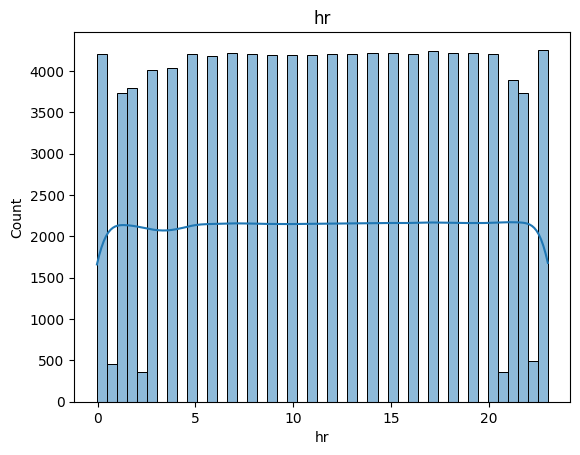

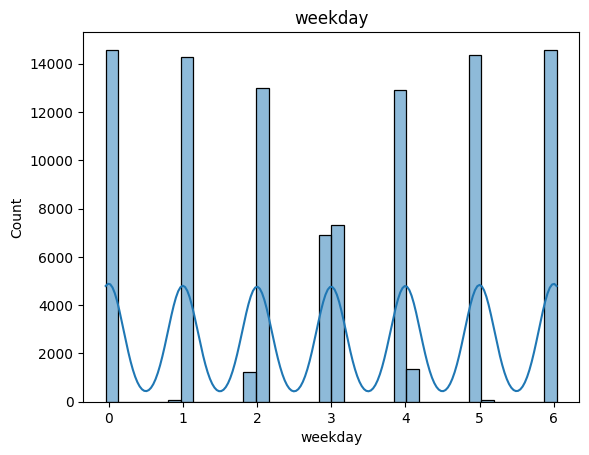

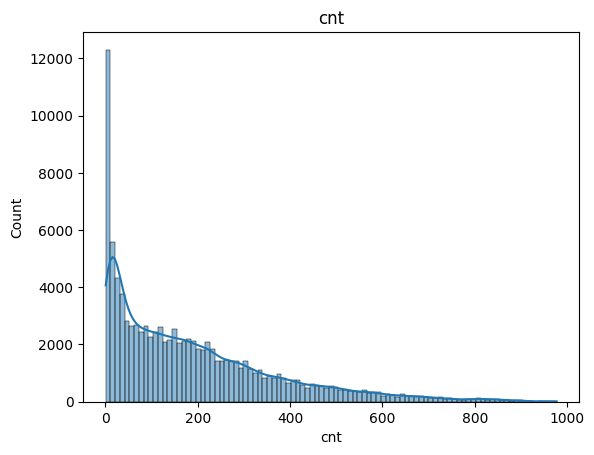

In [24]:
### Distribution of numerical and categorical data

import seaborn as sns
import matplotlib.pyplot as plt

# Numerical distributions
num_cols = df.select_dtypes(include=["int64","float64"]).columns
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

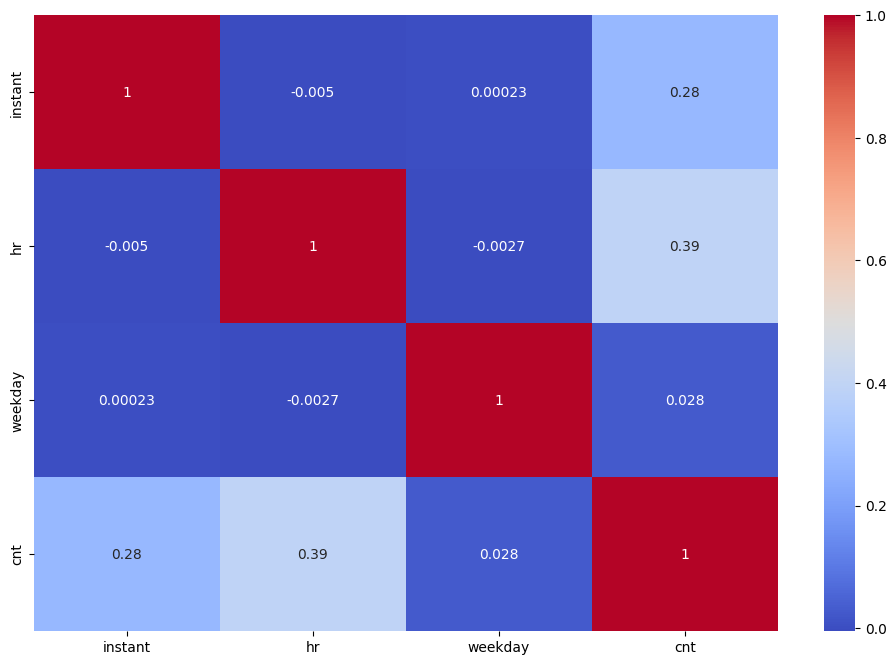

In [25]:
### Correlation matrix and heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

In [26]:
## Hypothesis testing

from scipy.stats import ttest_ind

# Separate bike counts based on working day
working_day = df[df["workingday"] == "Working"]["cnt"]
non_working_day = df[df["workingday"] == "No work"]["cnt"]

# Perform t-test
t_stat, p_value = ttest_ind(working_day, non_working_day, equal_var=False)

t_stat, p_value

c:\Users\DELL\anaconda3\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


(np.float64(nan), np.float64(nan))

In [27]:
### One hot encoding

df_encoded = pd.get_dummies(df, drop_first=True)

In [28]:
### Feature scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df_encoded.drop("cnt", axis=1))
y = df_encoded["cnt"]


In [29]:
### Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.9999999968619757

### Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV
import numpy as np

alphas = np.arange(0.01, 10, 0.05)
lasso = LassoCV(alphas=alphas, cv=5)
lasso.fit(X_train, y_train)

lasso.alpha_

### Ridge Regression

In [18]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

ridge.alpha_

np.float64(0.01)

### Evaluation

In [19]:
for model, name in [(lasso, "Lasso"), (ridge, "Ridge")]:
    y_pred = model.predict(X_test)
    print(name)
    print("R2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("-"*30)

Lasso
R2: 0.9995964110514967
MSE: 13.28639789942165
RMSE: 3.6450511518251223
MAE: 0.8162194656611611
------------------------------
Ridge
R2: 0.9999999968533665
MSE: 0.00010358912186067006
RMSE: 0.010177874132679676
MAE: 0.0080973487072541
------------------------------
